Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes

In [272]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [69]:
# Cargar el archivo CSV
path = "/Users/marianazuniga/Downloads/iris.csv"
df = pd.read_csv(path)

In [87]:
# Verificar las primeras filas del DataFrame
print(df.head())

# Seleccionar las características (primeras 4 columnas)
X = df.iloc[:, :4].values  # Convertir a array de NumPy


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [89]:
# Estandarizar los datos
media, sigma = X.mean(axis=0), X.std(axis=0)
X_std = (X - media) / sigma

In [91]:
# Verificar las primeras filas de los datos estandarizados
print(pd.DataFrame(X_std).head())

          0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444


In [93]:
# Calcular la matriz de covarianza
cov_matrix = (X_std - X_std.mean(axis=0)).T.dot((X_std - X_std.mean(axis=0))) / (X_std.shape[0] - 1)

# Verificar la matriz de covarianza
print("Matriz de covarianza:")
print(cov_matrix)


Matriz de covarianza:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Indicar el porcentaje de la información utilizando los 3 componentes principales

In [97]:
#Calcular valores propios y vectores propios
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

# Crear pares de valores y vectores propios
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:, i]) for i in range(len(eig_vals))]

# Ordenar los pares de mayor a menor
eigen_pairs.sort(reverse=True)

# Seleccionar solo las 3 primeras componentes principales
eigen_pairs = eigen_pairs[:3]

# Calcular los porcentajes de varianza explicada
total_sum = sum(eig_vals)
var_exp = [(i / total_sum) * 100 for i in sorted(eig_vals, reverse=True)][:3]

# Calcular la varianza acumulada
cum_var_exp = np.cumsum(var_exp)

# Mostrar los resultados
print("Varianza explicada por cada componente:")
for i, var in enumerate(var_exp):
    print(f"PC{i+1}: {var:.2f}%")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cum_var_exp):
    print(f"PC{i+1}: {cum_var:.2f}%")

Varianza explicada por cada componente:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%

Varianza acumulada:
PC1: 72.96%
PC2: 95.81%
PC3: 99.48%


In [ ]:
Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

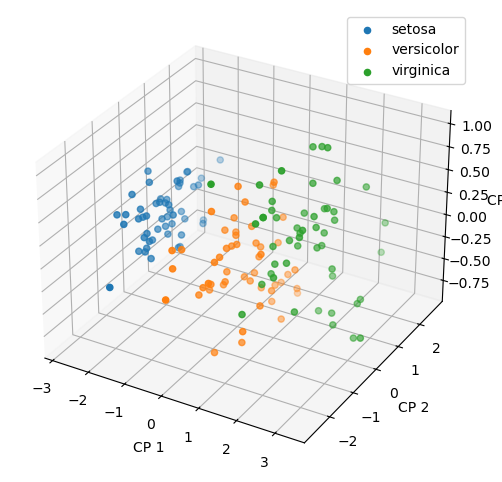

In [105]:
# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
data_proyectada = pca.fit_transform(X_std)

# Extraer las etiquetas de las especies
y = df['Species']

# Crear una figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Habilitar proyección 3D

# Graficar los datos proyectados en 3D
for name in ('setosa', 'versicolor', 'virginica'):
    ax.scatter(data_proyectada[y == name, 0],  # Componente Principal 1
               data_proyectada[y == name, 1],  # Componente Principal 2
               data_proyectada[y == name, 2],  # Componente Principal 3
               label=name)

# Etiquetas de los ejes
ax.set_xlabel("CP 1")
ax.set_ylabel("CP 2")
ax.set_zlabel("CP 3")

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [242]:
# Cargar el archivo CSV
brain_t = "/Users/marianazuniga/Downloads/Brain Tumor.csv"
df_b = pd.read_csv(brain_t)

In [244]:
# Verificar las primeras filas del DataFrame
print(df_b.head())

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [248]:
df_b = df_b.drop(columns=['Image', 'Class', 'Coarseness'])
print(df_b.head())

       Mean     Variance  Standard Deviation   Entropy  Skewness   Kurtosis  \
0  6.535339   619.587845           24.891522  0.109059  4.276477  18.900575   
1  8.749969   805.957634           28.389393  0.266538  3.718116  14.464618   
2  7.341095  1143.808219           33.820234  0.001467  5.061750  26.479563   
3  5.958145   959.711985           30.979219  0.001477  5.677977  33.428845   
4  7.315231   729.540579           27.010009  0.146761  4.283221  19.079108   

     Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0   98.613971  0.293314  0.086033     0.530941       4.473346     0.981939  
1   63.858816  0.475051  0.225674     0.651352       3.220072     0.988834  
2   81.867206  0.031917  0.001019     0.268275       5.981800     0.978014  
3  151.229741  0.032024  0.001026     0.243851       7.700919     0.964189  
4  174.988756  0.343849  0.118232     0.501140       6.834689     0.972789  


In [250]:
# Convertir el DataFrame a un array de NumPy
X_d = df_b.to_numpy()


In [ ]:
Determinar el porcentaje de aporte de cada vector propio

In [288]:
# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(df_b)

# Aplicar PCA
pca = PCA()  # Por defecto, calcula todos los componentes
X_pca = pca.fit_transform(X_std)

# Calcular la varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Convertir a porcentajes
varianza_explicada_porcentaje = varianza_explicada * 100
varianza_acumulada_porcentaje = varianza_acumulada * 100

# Resultados
print("Varianza explicada por cada componente (%):")
for i, varianza_explicada_porcentaje in enumerate(varianza_explicada_porcentaje):
    print(f"PC{i+1}: {varianza_explicada_porcentaje:.2f}%")

print("\nVarianza acumulada (%):")
for i, varianza_acumulada_porcentaje in enumerate(varianza_acumulada_porcentaje):
    print(f"PC{i+1}: {varianza_acumulada_porcentaje:.2f}%")


Varianza explicada por cada componente (%):
PC1: 40.88%
PC2: 31.30%
PC3: 12.87%
PC4: 6.26%
PC5: 4.78%
PC6: 2.00%
PC7: 1.08%
PC8: 0.33%
PC9: 0.26%
PC10: 0.14%
PC11: 0.09%
PC12: 0.00%

Varianza acumulada (%):
PC1: 40.88%
PC2: 72.18%
PC3: 85.06%
PC4: 91.32%
PC5: 96.10%
PC6: 98.10%
PC7: 99.18%
PC8: 99.52%
PC9: 99.77%
PC10: 99.91%
PC11: 100.00%
PC12: 100.00%


In [ ]:
Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos

In [292]:

# Determinar el número de componentes para alcanzar al menos el 90% de varianza
n_componentes = np.argmax(varianza_acumulada >= 0.90) + 1


print(f"\nNúmero de componentes necesarios para el 90% de varianza: {n_componentes}")


Número de componentes necesarios para el 90% de varianza: 4


In [ ]:
Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

In [324]:


T_matrix = np.stack([eigen_pairs[i][1] for i in range(4)], axis=1)

# Crear una lista para almacenar los vectores proyectados
espacio_proyectado = []

# Proyectar cada vector en el espacio reducido de 4 dimensiones
for idx in range(len(X_std)):
    vec = X_std[idx, :]  # vector en R4
    Tvec = T_matrix.T.dot(vec)  # Proyección del vector sobre las 4 componentes principales
    espacio_proyectado.append(Tvec)

# Convertir el espacio proyectado en un arreglo NumPy
espacio_proyectado_np = np.array(espacio_proyectado)

# Crear un DataFrame con las 4 componentes proyectadas
df_proyectado = pd.DataFrame({
    'CP1': espacio_proyectado_np[:, 0], 
    'CP2': espacio_proyectado_np[:, 1], 
    'CP3': espacio_proyectado_np[:, 2],
    'CP4': espacio_proyectado_np[:, 3]
})

# Mostrar el DataFrame proyectado
df_proyectado

,CP1,CP2,CP3,CP4
0,1.134947,-0.116539,-0.122074,0.306272
1,4.262143,0.049437,1.500706,-0.313062
2,-2.481383,1.111446,-0.957833,0.117939
3,-3.074085,0.235259,-0.388747,0.687068
4,0.900927,-0.311275,1.345354,0.830260
...,...,...,...,...
3757,-0.321001,2.161311,1.250400,-0.579057
3758,-0.205905,2.131569,1.261261,-0.556632
3759,-0.203598,1.775664,1.133058,-0.338989
3760,-0.273145,0.655034,1.593303,0.421314


<Figure size 500x500 with 0 Axes>

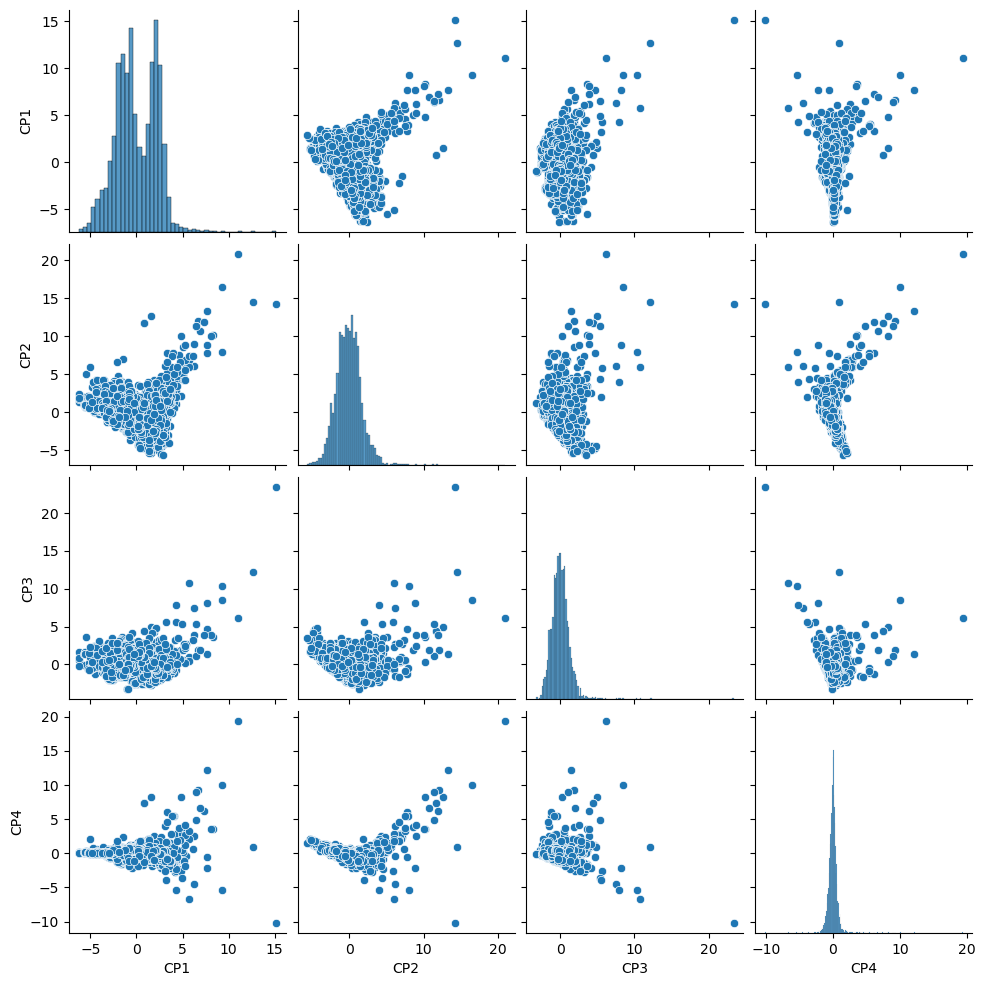

In [320]:
from sklearn.decomposition import PCA

# Realizar PCA con 4 componentes principales
pca = PCA(n_components=4)
X_projected = pca.fit_transform(X_std)  # X_std es el conjunto de datos estándar

# Crear DataFrame con las componentes principales
df_proyectado = pd.DataFrame(X_projected, columns=['CP1', 'CP2', 'CP3', 'CP4'])

# Visualizar relaciones entre componentes principales
plt.figure(figsize=(5, 5))
sns.pairplot(df_proyectado)
plt.show()

In [ ]:
Hacer la comparacion de los pairplot con la data original y la data proyectada

<Figure size 500x500 with 0 Axes>

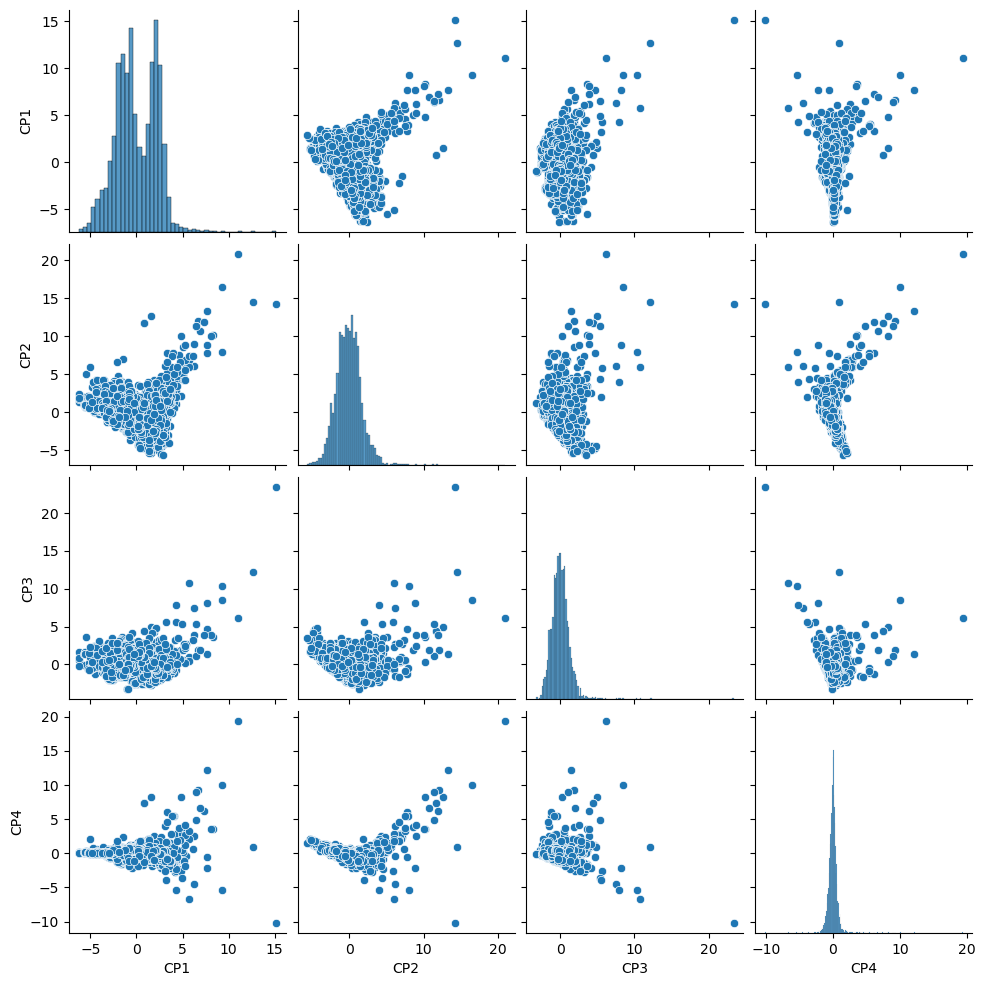

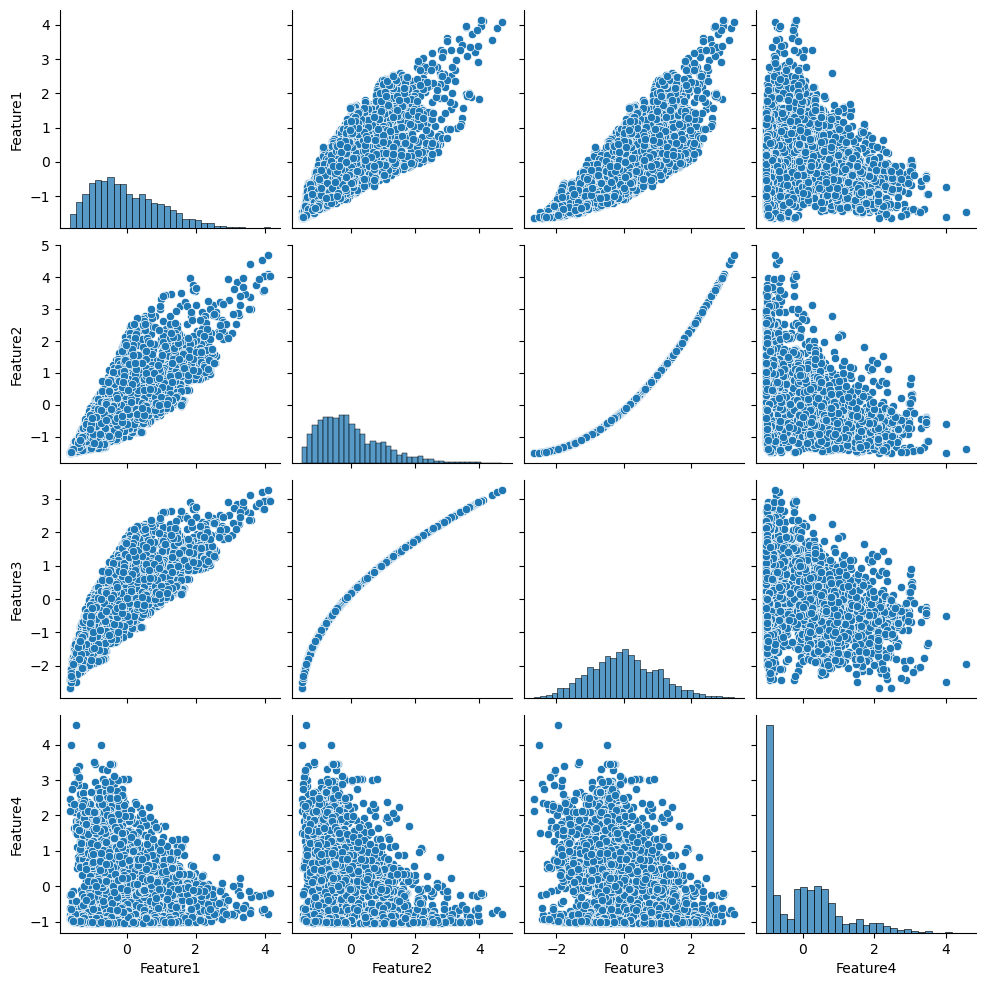

CP1 y CP2 tienen una relación no completamente lineal, lo que sugiere que CP2 aún captura información relevante que no está en CP1
CP1 y CP2 tienen valores más dispersos, lo que indica que explican más varianza que CP3 y CP4


In [306]:
pca = PCA(n_components=4)
X_projected = pca.fit_transform(X_std)

# Crear DataFrame con las componentes principales
df_proyectado = pd.DataFrame(X_projected, columns=['CP1', 'CP2', 'CP3', 'CP4'])

# Visualizar relaciones entre componentes principales
plt.figure(figsize=(5, 5))
sns.pairplot(df_proyectado)
plt.show()

# Comparar con las características originales
df_original = pd.DataFrame(X_std[:, :4], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
sns.pairplot(df_original)
plt.show()

# Interpretación
print("CP1 y CP2 tienen una relación no completamente lineal, lo que sugiere que CP2 aún captura información relevante que no está en CP1")
print("CP1 y CP2 tienen valores más dispersos, lo que indica que explican más varianza que CP3 y CP4")